In [122]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import scipy as sc
import scipy.stats as stats

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Crea una caja en 2d de tamaño 1000 con las siguientes distribuciones

In [123]:
L = 1000 #tamaño de la caja

a) puntos en una malla cuadriculada de distancia (10x10 cada retícula)


In [124]:
"""parámetros"""
a = 50 #tamaño de los pasos
N = 10 #no. partículas

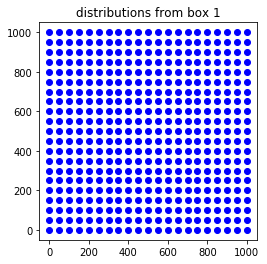

In [125]:
mgrid = np.lib.index_tricks.nd_grid()
malla_x, malla_y = mgrid[ 0:L+a:a, 0:L+a:a ]

plt.plot(malla_x, malla_y,'o', color = 'b');
plt.title('distributions from box 1')
plt.axis('scaled');
#plt.xlim(0, 100)
#plt.ylim(0, 100)

b) 1000 puntos sobre un disco de radio 300

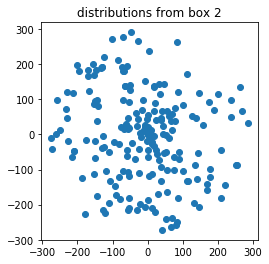

In [126]:
#definimos la ecuación de un círculo
N = 200
R = 300*np.random.rand(N) #Radio random

rng = 2*np.pi*np.random.rand(N) #ángulo random
x1 = R*np.cos(rng)
x2 = R*np.sin(rng)

plt.plot(x1,x2,'o')
plt.axis('scaled');
plt.title('distributions from box 2')
#plt.grid(linestyle = '--')
plt.show()

c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290

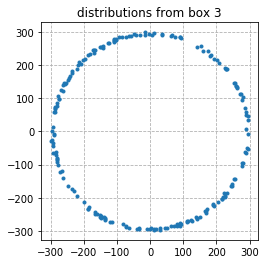

In [127]:
N = 200
delta = 10 #ancho del anillo
r2 = 290 + np.random.rand(N)*delta
ych = r2*np.cos(rng)
y2ch =r2*np.sin(rng)

plt.plot(ych,y2ch,'.')
plt.title('distributions from box 3')
plt.axis('scaled');
plt.grid(linestyle = '--')

d) 50 anillos con 100 untos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

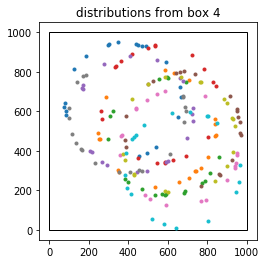

In [128]:
n = 10 #no. anillos
N1 = 20 #nuevo no. de partículas

plt.axes()
box2d = plt.Rectangle((0,0),L,L , fc = 'white', ec = 'k')
plt.gca().add_patch(box2d)
plt.axis('scaled')

dataxc4 = np.zeros((n,N1))
datayc4 = np.zeros((n,N1))

for i in range(n):
    
        ang = 2*np.pi*np.random.rand(N1) #ángulo random

        radio = 290 + np.random.rand(N1)*delta

        centrox = np.random.rand()*(L - 2*300) + 300 #centros aleatorios
        centroy = np.random.rand()*(L - 2*300) + 300

        xrings = radio*np.cos(ang) + centrox 
        yrings =radio*np.sin(ang) + centroy 
        
        dataxc4[i] = dataxc4[i] + xrings
        datayc4[i] = datayc4[i] + yrings
        
        plt.plot(xrings,yrings,'.')
        plt.title('distributions from box 4')
        plt.axis('scaled');
        #plt.grid(linestyle = '--')
    

# Haz un algoritmo que calcule la función de correlación con DD/RR-1 con el mismo número de puntos aleatorios que datos, y comprueba que si usas muestras aleatorias la función de correlación es cero. Cambia el número de puntos y el tamaño de bin, y observa qué ocurre.

Hauser and Peebles (1974):

$$\chi_{ HP}(r)=\frac{N_R}{N_D}\frac{DD(r)}{RR(r)}−1$$

The Davis & Peebles Estimator
An early estimator that was widely used is from Davis and Peebles (1983):

$$\chi_{ DP}(r)=\frac{N_R}{N_D}\frac{DD(r)}{DR(r)}−1$$


The Hamilton Estimator
An estimator with smaller statistical errors was later introduced by Hamilton (1993):

$$\chi_{H(r)}=\frac{DD(r)RR(r)}{(DR(r))^2} − 1 $$


The Landy & Szalay Estimator
Finally, one of the most commonly used estimators, which cross-correlates the data and random catalogs in a manner to minimize edge and mask effects is that by Landy and Szalay (1993):

$$\chi_{LS}(r)=\frac{DD(r)−2DR(r)+RR(r)}{RR(r)}$$

$DD(r)$ is the counts of pairs of points (within distance $r$ and $r+δr)$, in the observed data catalog, and $RR(r)$ is the number of pairs of points as a function of separation in the random catalog with the same mean density and sampling geometry as the data catalog and with separation between $r$ and $r+δr$. Finally $DR(r)$ is the number of cross-correlated data-random pairs (within distance $r$ and $r+δr$). Also, ND and NR are the number of points in the observed data and in the random catalog respecively. 

In [131]:
def histogramas(datax, datay, Nr,L,barras,Rmax = 1000): #Bins = no. de cajones para el histograma  
    #L = 1000 #tamaño de la caja
    
    dx =Rmax/bins #ratio de crecimiento
    rango = np.arange(dx/2, Rmax + dx/2, dx)
    
    datax = datax.flatten()
    datay = datay.flatten()
    Nd = len(datax)
    datarandom = np.random.rand(Nr,2)*L
    
    DD = np.zeros(barras)
    #DD de la partícula j-ésima hacia la i-ésima
    for j in range(Nd):
        for i in range(j+1,Nd):
            dx_c1 = datax[i] - datax[j]
            dy_c1 = datay[i] - datay[j]
            r_c1 = ((dx_c1)**2 + (dy_c1)**2)**(1/2)
            no_barra = int(round((r_c1/dx) + 0.5) - 1)
            
            if no_barra < barras:
                DD[no_barra] = DD[no_barra] + 1
        
    #RR de la partícula j-ésima hacia la i-ésima
    RR = np.zeros(barras)
    for j in range(Nr):
        for i in range(j+1,Nr):
            rngx_c1 = datarandom[i,0] - datarandom[j,0]
            rngy_c1 = datarandom[i,1] - datarandom[j,1]
            r_rngc1 = ((rngx_c1)**2 + (rngy_c1)**2)**(1/2)
            no_barra_rng = int(round((r_rngc1/dx) + 0.5) - 1)
            
            if no_barra_rng < barras:
                
                RR[no_barra_rng] = RR[no_barra_rng] + 1

        
    #DR de la partícula j-ésima de D hacia la i-ésima de R
    DR = np.zeros(barras)
    for j in range(Nd):
        for i in range(Nr):
            xtorng_c1 = datarandom[i,0] - datax[j]
            ytorng_c1 = datarandom[i,1] - datay[j]
            r_dtorng_c1 = ((xtorng_c1)**2 + (ytorng_c1)**2)**(1/2)
            no_barra_dtorng1 = int(round((r_dtorng_c1/dx) + 0.5) - 1)
            
            if no_barra_dtorng1 < barras:
                
                DR[no_barra_dtorng1] = DR[no_barra_dtorng1] + 1
            
    """Let's define a functions that normalizes the data"""    
    
    DDnorm = (2*DD)/((Nd)*(Nd-1))
    DRnorm = DR/(Nd*Nr)
    RRnorm = (2*RR)/((Nr)*(Nr-1))
               
#     #normalized histogram plots
#     plt.plot(rango, DDnorm, label = 'DD')
#     plt.plot(rango, RRnorm, label ='RR')
#     plt.plot(rango, DRnorm, label = 'DR')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     plt.title('distance frequencies (normalized)')
#     plt.grid(linestyle = '--')
#     plt.show()   

     
    
    return  RRnorm, DRnorm, DDnorm, rango
    

In [132]:

Rmax = 100
bins = 100
datax1 = malla_x
datay1 = malla_y
Nr1 = len(datax1.flatten())
RR, DR, DD, rango = histogramas(datax1, datay1, Nr1,L, bins , Rmax)

C:\Users\Dea\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


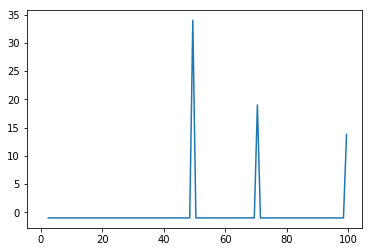

In [133]:
HP=DD/RR-1
plt.plot(rango,HP)

# Calcula la función de correlación para cada una de las cajas de datos del inciso anterior, usando los estimadores de, y recuerda escoger un bin adecuado para ver las señales. Utiliza 10 veces el número de puntos en las muestras aleatorias que con los datos.

In [136]:
"""definimos una función que calcula los estimadores de correlación"""

def Correlations(DD, RR, DR, rango):
    
    
    Xhp = (DD/RR) - 1 #Hauser & Peebles
    Xdp = (DD/DR) - 1 #Davis & Peebles
    Xh = (DD*RR)/((DR)**2) - 1 #Hamilton
    Xls = (DD -2*DR + RR)/RR #The Landy & Szalay
    
    
    #correlation plots
    plt.plot(rango, Xhp, label ='Hauser & Peebles')
    plt.plot(rango, Xdp, label ='Davis & Peebles')
    plt.plot(rango, Xh, label ='Hamilton')
    plt.plot(rango, Xls, label ='Landy & Szalay')
    plt.title('Correlation functions')
    plt.grid(linestyle = '--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
 
    
    return Xhp, Xdp, Xh, Xls
    

In [138]:
"""para 10 veces la cant. de datos para la primer caja"""

RR10, DR10, DD10, rang10 = histogramas(datax1, datay1, Nr1*10,L,bins,Rmax)

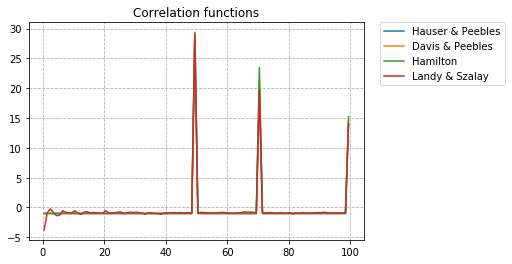

In [139]:
Correlations(DD10, RR10, DR10, rang10);

# Caja 2

In [140]:
Rmax = 700
bins = 100
datax = x1
datay = x2
Nr = len(datax.flatten())

In [141]:
RR10, DR10, DD10, rang10 = histogramas(datax, datay, Nr*10,L,bins,Rmax)

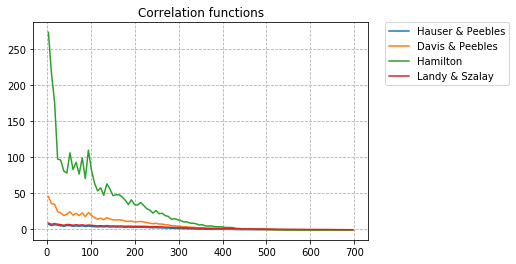

In [142]:
Correlations(DD10, RR10, DR10, rang10);

# Caja 3

In [143]:
Rmax = 100
bins = 100
datax = ych
datay = y2ch
Nr = len(datax.flatten())

In [144]:
RR10, DR10, DD10, rang10 = histogramas(datax, datay, Nr*10,L,bins,700)

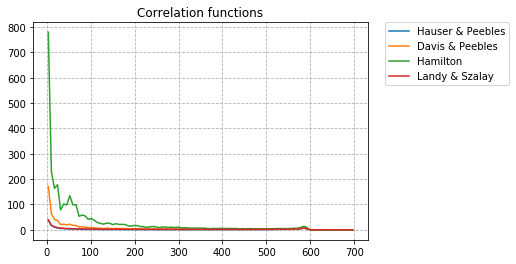

In [145]:
Correlations(DD10, RR10, DR10, rang10);

# Caja 4

In [146]:
bins = 100
datax = dataxc4
datay =datayc4
Nr = len(datax.flatten())

In [147]:
RR10, DR10, DD10, rang10 = histogramas(datax, datay, Nr*10,L,bins,700)

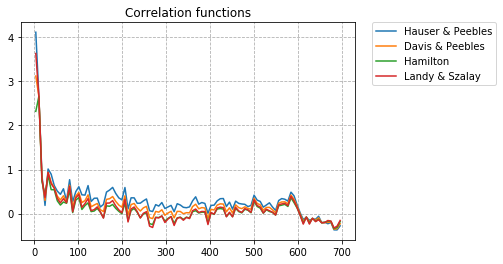

In [148]:
Correlations(DD10, RR10, DR10, rang10);

# Observar como cambia la función de correlación con el número de puntos aleatorios.  

a) Usando 1 archivo con 1, 5, 10 y 50 veces el número de puntos que los datos, y promedia los histogramas

 b) Usando 1 archivo con 1, 5, 10 y 50 veces el número de puntos que los datos, y promedia las funciones de correlación

c) Usando 1, 5, 10 y 50 archivos de muestras aleatorias con el mismo número de puntos que los datos

# Caja1

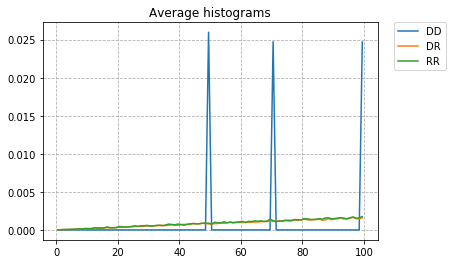

In [151]:
Rmax = 100
bins = 100
datax1 = malla_x
datay1 = malla_y
Nr1 = len(datax1.flatten())

#Histogramas
RR, DR, DD, rango = histogramas(datax1, datay1, Nr1,L, bins , Rmax)
RR5, DR5, DD5, rang = histogramas(datax1, datay1, Nr1*5,L,bins,Rmax)
RR10, DR10, DD10, rang = histogramas(datax1, datay1, Nr1*10,L,bins,Rmax)

RRavrg = RR + RR5 + RR10
DRavrg = DR + DR5 + DR10
DDavrg = DD + DD5 + DD10

plt.plot(rango, DDavrg, label = 'DD' )
plt.plot(rango, DRavrg, label = 'DR' )
plt.plot(rango, RRavrg, label = 'RR' )
plt.title('Average histograms')
plt.grid(linestyle = '--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

C:\Users\Dea\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Dea\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


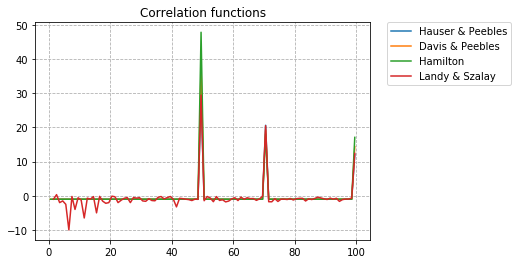

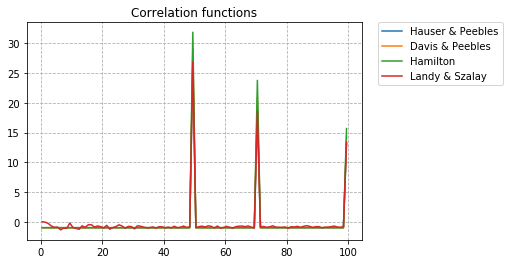

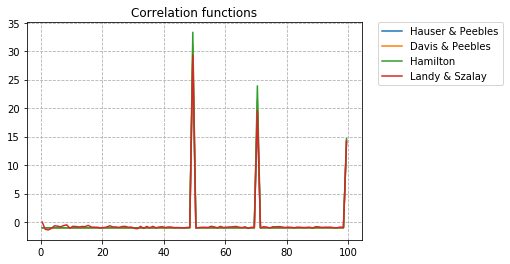

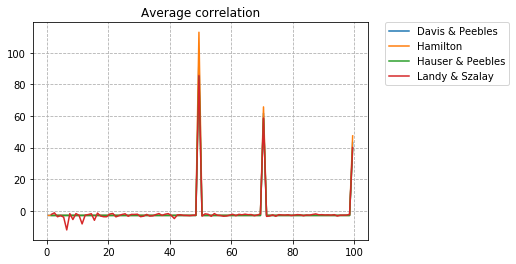

In [152]:
#correlaciones
Xhp, Xdp, Xh, Xls = Correlations(DD, RR, DR, rango);
Xhp5, Xdp5, Xh5, Xls5 = Correlations(DD5, RR5, DR5, rang);
Xhp10, Xdp10, Xh10, Xls10 = Correlations(DD10, RR10, DR10, rang);

XdpAvrg = Xdp10 + Xdp + Xdp5
XhAvrg = Xh10 + Xh+ Xh5
XhpAvrg =Xhp10 + Xhp + Xhp5
XlsAvrg =Xls10 + Xls + Xls5

plt.plot(rango, XdpAvrg, label = 'Davis & Peebles')
plt.plot(rango, XhAvrg, label =  'Hamilton')
plt.plot(rango, XhpAvrg, label =  'Hauser & Peebles')
plt.plot(rango, XlsAvrg, label = 'Landy & Szalay')
plt.grid(linestyle = '--')
plt.title('Average correlation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

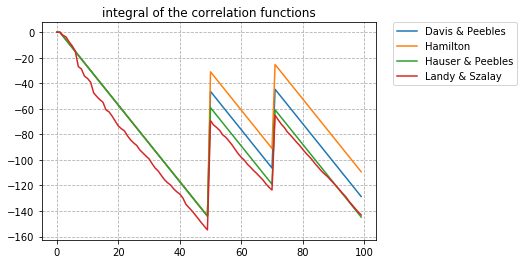

In [157]:
corr1 = [XdpAvrg, XhAvrg, XhpAvrg, XlsAvrg]
k1 = len(corr1[0])
k = len(corr1[:])
s = (k,k1)
labels = ['Davis & Peebles', 'Hamilton', 'Hauser & Peebles','Landy & Szalay']

intCorrc1 = np.zeros(s)

for i in range(k):
    for j in range(1,k1-1):
        intCorrc1[i,j+1] = intCorrc1[i,j] + corr1[i][j]
    
    plt.plot(intCorrc1[i], label = str(labels[i]))
    plt.grid(linestyle = '--')
    plt.legend()
    plt.title('integral of the correlation functions')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Caja2
esfera

In [205]:
Rmax = 700
bins = 100
datax = x1
datay = x2
Nr = len(datax.flatten())

In [206]:
#Histogramas
RR, DR, DD, rango = histogramas(datax, datay, Nr,L, bins , 700)
RR5, DR5, DD5, rang = histogramas(datax, datay, Nr*5,L,bins,700)
RR10, DR10, DD10, rang = histogramas(datax, datay, Nr*10,L,bins,700)

RRavrg = RR + RR5 #+ RR10
DRavrg = DR + DR5 #+ DR10
DDavrg = DD + DD5 #+ DD10

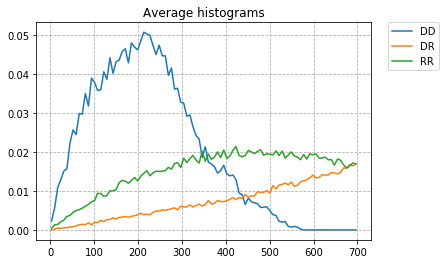

In [207]:
plt.plot(rango, DDavrg, label = 'DD' )
plt.plot(rango, DRavrg, label = 'DR' )
plt.plot(rango, RRavrg, label = 'RR' )
plt.title('Average histograms')
plt.grid(linestyle = '--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

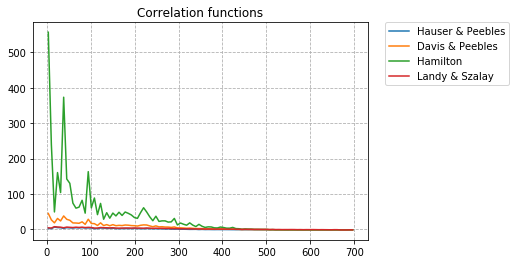

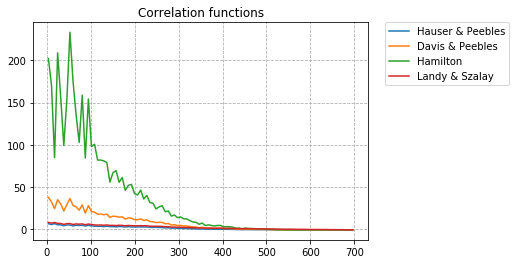

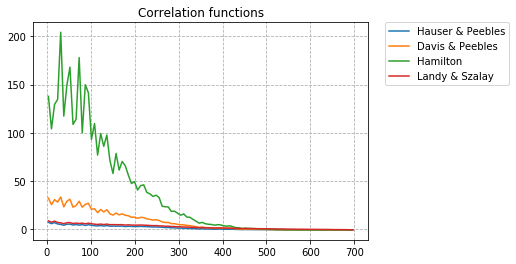

In [208]:
#correlaciones
Xhp, Xdp, Xh, Xls = Correlations(DD, RR, DR, rango);
Xhp5, Xdp5, Xh5, Xls5 = Correlations(DD5, RR5, DR5, rang);
Xhp10, Xdp10, Xh10, Xls10 = Correlations(DD10, RR10, DR10, rang);

XdpAvrg =  Xdp + Xdp5  + Xdp10 
XhAvrg =  Xh5+ Xh + Xh10 
XhpAvrg = Xhp + Xhp5  +Xhp10 
XlsAvrg =Xls5 + Xls + Xls10

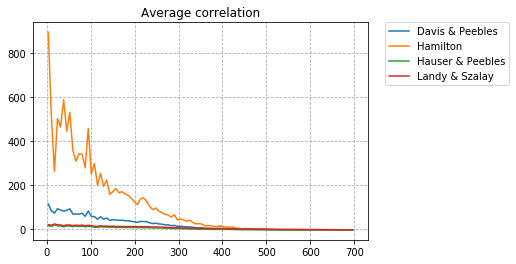

In [209]:
plt.plot(rango, XdpAvrg, label = 'Davis & Peebles')
plt.plot(rango, XhAvrg, label =  'Hamilton')
plt.plot(rango, XhpAvrg, label =  'Hauser & Peebles')
plt.plot(rango, XlsAvrg, label = 'Landy & Szalay')
plt.grid(linestyle = '--')
plt.title('Average correlation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

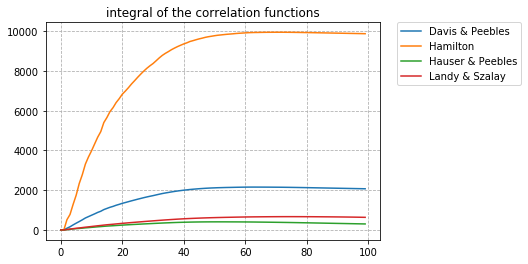

In [210]:
corr1 = [XdpAvrg, XhAvrg, XhpAvrg, XlsAvrg]
k1 = len(corr1[0])
k = len(corr1[:])
s = (k,k1)
labels = ['Davis & Peebles', 'Hamilton', 'Hauser & Peebles','Landy & Szalay']

intCorrc1 = np.zeros(s)

for i in range(k):
    for j in range(1,k1-1):
        intCorrc1[i,j+1] = intCorrc1[i,j] + corr1[i][j]
    
    plt.plot(intCorrc1[i], label = str(labels[i]))
    plt.grid(linestyle = '--')
    plt.legend()
    plt.title('integral of the correlation functions')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Caja 3
anillo

In [199]:
bins = 100
datax = ych
datay = y2ch
Nr = len(datax.flatten())

In [200]:
#Histogramas
RR, DR, DD, rango = histogramas(datax, datay, Nr,L, bins , 700)
RR5, DR5, DD5, rang = histogramas(datax, datay, Nr*5,L,bins,700)
#RR10, DR10, DD10, rang = histogramas(datax, datay, Nr*10,L,bins,700)

RRavrg = RR + RR5# + RR10
DRavrg = DR + DR5# + DR10
DDavrg = DD + DD5# + DD10

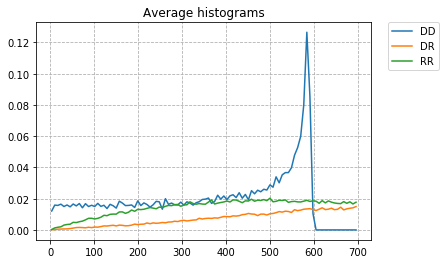

In [201]:
plt.plot(rango, DDavrg, label = 'DD' )
plt.plot(rango, DRavrg, label = 'DR' )
plt.plot(rango, RRavrg, label = 'RR' )
plt.title('Average histograms')
plt.grid(linestyle = '--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

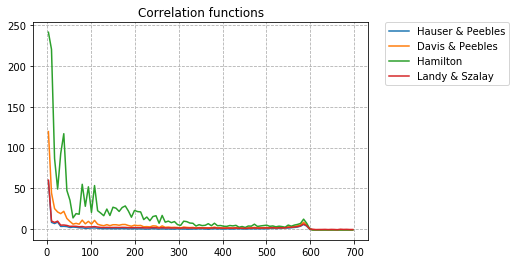

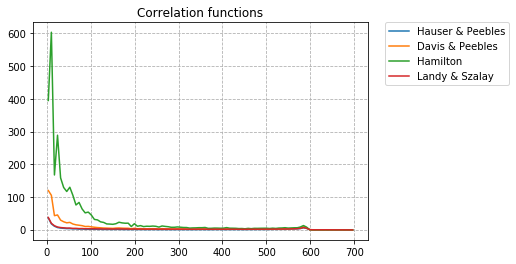

In [202]:
#correlaciones
Xhp, Xdp, Xh, Xls = Correlations(DD, RR, DR, rango);
Xhp5, Xdp5, Xh5, Xls5 = Correlations(DD5, RR5, DR5, rang);
#Xhp10, Xdp10, Xh10, Xls10 = Correlations(DD10, RR10, DR10, rang);

XdpAvrg =  Xdp + Xdp5 # + Xdp10 
XhAvrg =  Xh5+ Xh #+ Xh10 
XhpAvrg = Xhp + Xhp5 # +Xhp10 
XlsAvrg =Xls5 + Xls# + Xls10

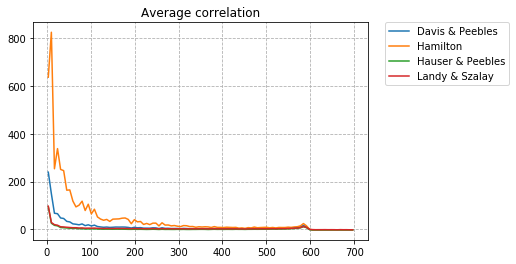

In [203]:
plt.plot(rango, XdpAvrg, label = 'Davis & Peebles')
plt.plot(rango, XhAvrg, label =  'Hamilton')
plt.plot(rango, XhpAvrg, label =  'Hauser & Peebles')
plt.plot(rango, XlsAvrg, label = 'Landy & Szalay')
plt.grid(linestyle = '--')
plt.title('Average correlation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

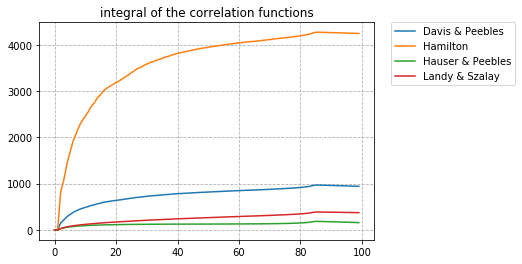

In [204]:
corr1 = [XdpAvrg, XhAvrg, XhpAvrg, XlsAvrg]
k1 = len(corr1[0])
k = len(corr1[:])
s = (k,k1)
labels = ['Davis & Peebles', 'Hamilton', 'Hauser & Peebles','Landy & Szalay']

intCorrc1 = np.zeros(s)

for i in range(k):
    for j in range(1,k1-1):
        intCorrc1[i,j+1] = intCorrc1[i,j] + corr1[i][j]
    
    plt.plot(intCorrc1[i], label = str(labels[i]))
    plt.grid(linestyle = '--')
    plt.legend()
    plt.title('integral of the correlation functions')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Caja 4
Anillos

In [193]:
bins = 100
datax = dataxc4
datay = datayc4
Nr = len(datax.flatten())

In [194]:
#Histogramas
RR, DR, DD, rango = histogramas(datax, datay, Nr,L, bins , 700)
RR5, DR5, DD5, rang = histogramas(datax, datay, Nr*5,L,bins,700)
#RR10, DR10, DD10, rang = histogramas(datax, datay, Nr*10,L,bins,700)

RRavrg = RR + RR5# + RR10
DRavrg = DR + DR5# + DR10
DDavrg = DD + DD5# + DD10

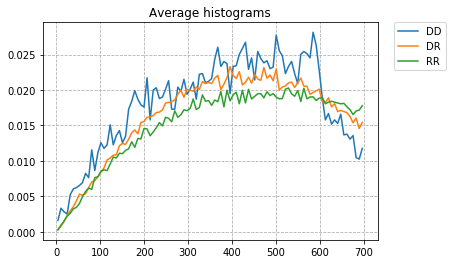

In [195]:
plt.plot(rango, DDavrg, label = 'DD' )
plt.plot(rango, DRavrg, label = 'DR' )
plt.plot(rango, RRavrg, label = 'RR' )
plt.title('Average histograms')
plt.grid(linestyle = '--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

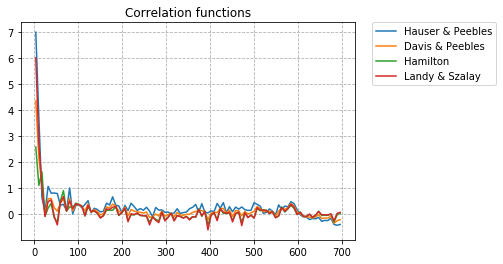

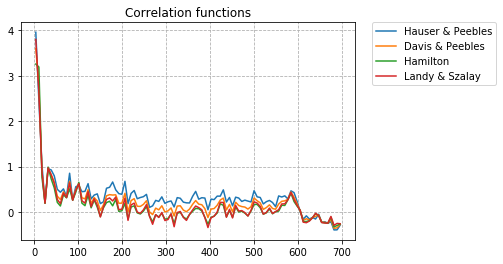

In [196]:
#correlaciones
Xhp, Xdp, Xh, Xls = Correlations(DD, RR, DR, rango);
Xhp5, Xdp5, Xh5, Xls5 = Correlations(DD5, RR5, DR5, rang);
#Xhp10, Xdp10, Xh10, Xls10 = Correlations(DD10, RR10, DR10, rang);

XdpAvrg =  Xdp + Xdp5 # + Xdp10 
XhAvrg =  Xh5+ Xh  #+ Xh10 
XhpAvrg = Xhp + Xhp5 # +Xhp10 
XlsAvrg =Xls5 + Xls# + Xls10

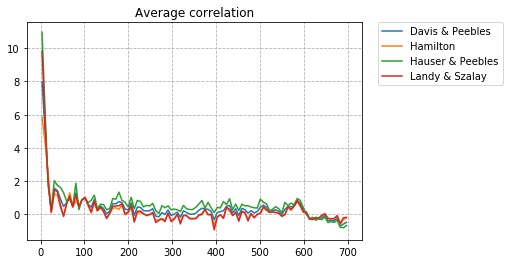

In [197]:
plt.plot(rango, XdpAvrg, label = 'Davis & Peebles')
plt.plot(rango, XhAvrg, label =  'Hamilton')
plt.plot(rango, XhpAvrg, label =  'Hauser & Peebles')
plt.plot(rango, XlsAvrg, label = 'Landy & Szalay')
plt.grid(linestyle = '--')
plt.title('Average correlation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

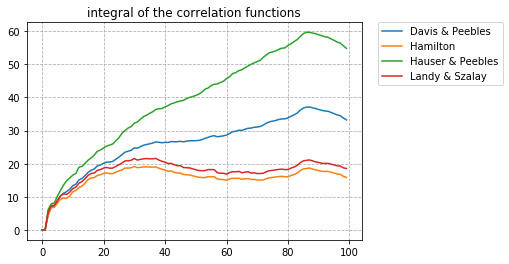

In [198]:
corr1 = [XdpAvrg, XhAvrg, XhpAvrg, XlsAvrg]
k1 = len(corr1[0])
k = len(corr1[:])
s = (k,k1)
labels = ['Davis & Peebles', 'Hamilton', 'Hauser & Peebles','Landy & Szalay']

intCorrc1 = np.zeros(s)

for i in range(k):
    for j in range(1,k1-1):
        intCorrc1[i,j+1] = intCorrc1[i,j] + corr1[i][j]
    
    plt.plot(intCorrc1[i], label = str(labels[i]))
    plt.grid(linestyle = '--')
    plt.legend()
    plt.title('integral of the correlation functions')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
